In [29]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [30]:
dataset = 'model/keypoint_classifier/keypoint.csv'
# Đổi phần mở rộng file lưu model từ .hdf5 sang .keras
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [31]:
NUM_CLASSES = 26

# Dataset reading

In [32]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [33]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [36]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 26)             │           286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356 (5.30 KB)

 Trainable params: 1,356 (5.30 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [38]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [39]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0322 - loss: 3.3000
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0325 - loss: 3.2991 - val_accuracy: 0.1286 - val_loss: 3.2106
Epoch 2/1000
44/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0634 - loss: 3.2201 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0668 - loss: 3.2130 - val_accuracy: 0.1662 - val_loss: 3.1034
Epoch 3/1000
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1104 - loss: 3.1092
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1112 - loss: 3.1074 - val_accuracy: 0.2165 - val_loss: 2.9023
Epoch 4/1000
51/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1445 - loss: 2.9508
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
60

In [40]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6360 - loss: 1.1008 


In [41]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [42]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[1.04567409e-03 1.16396509e-02 1.41762709e-03 3.88404727e-02
 5.11547085e-03 6.79275068e-03 5.10451828e-05 2.49494961e-03
 6.39360957e-03 3.06967809e-03 2.17407882e-01 9.93495528e-03
 4.58996146e-05 7.02630996e-06 2.66411598e-03 7.72406383e-06
 7.43412966e-05 1.60694122e-01 1.50179805e-03 1.11229345e-02
 2.72871584e-01 1.69278279e-01 6.07944205e-02 1.10301515e-02
 2.64858198e-03 3.05523979e-03]
20


# Confusion matrix

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step


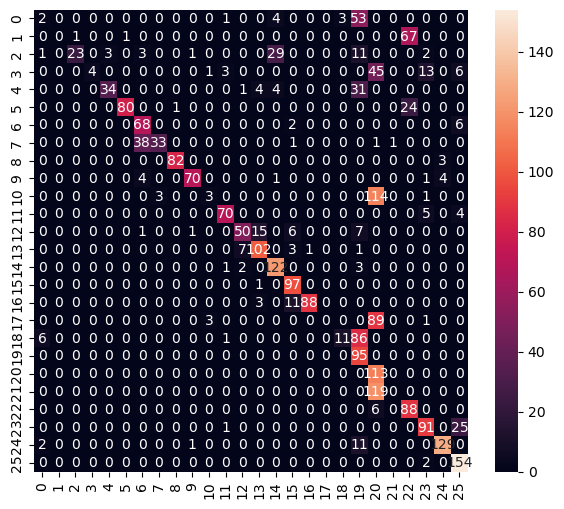

Classification Report
              precision    recall  f1-score   support

           0       0.18      0.03      0.05        63
           1       0.00      0.00      0.00        69
           2       0.96      0.32      0.47        73
           3       1.00      0.06      0.11        72
           4       0.92      0.46      0.61        74
           5       0.99      0.76      0.86       105
           6       0.60      0.89      0.72        76
           7       0.92      0.45      0.60        74
           8       0.99      0.96      0.98        85
           9       0.96      0.88      0.92        80
          10       0.43      0.02      0.05       121
          11       0.91      0.89      0.90        79
          12       0.83      0.62      0.71        80
          13       0.82      0.89      0.85       114
          14       0.76      0.95      0.85       128
          15       0.81      0.99      0.89        98
          16       0.99      0.86      0.92       102
     

a:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
a:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
a:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [44]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [45]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpd2whdbob\assets


INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpd2whdbob\assets


Saved artifact at 'C:\Users\acer\AppData\Local\Temp\tmpd2whdbob'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  2075116407312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2075116416720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2075116409424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2075116415376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2075116414224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2075116415760: TensorSpec(shape=(), dtype=tf.resource, name=None)


7600

# Inference test

In [46]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

a:\anaconda\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [47]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [48]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [49]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [50]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0456732e-03 1.1639660e-02 1.4176266e-03 3.8840473e-02 5.1154713e-03
 6.7927549e-03 5.1045041e-05 2.4949475e-03 6.3936086e-03 3.0696769e-03
 2.1740791e-01 9.9349497e-03 4.5899527e-05 7.0263040e-06 2.6641150e-03
 7.7240647e-06 7.4341311e-05 1.6069405e-01 1.5017967e-03 1.1122920e-02
 2.7287161e-01 1.6927834e-01 6.0794454e-02 1.1030142e-02 2.6485811e-03
 3.0552358e-03]
20
